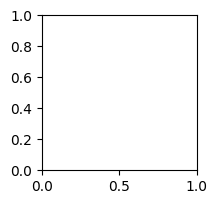

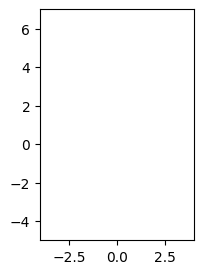

x_ticks =  [-4. -3. -2. -1.  0.  1.  2.  3.  4.]
y_ticks =  [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.  6.  7.]


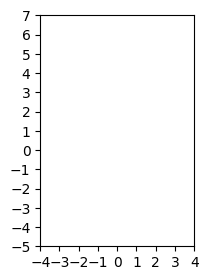

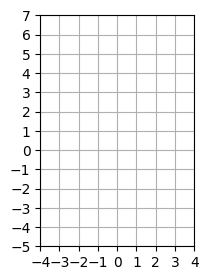

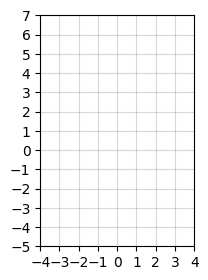

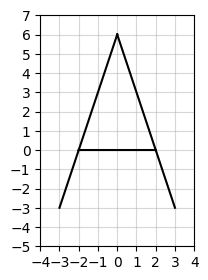

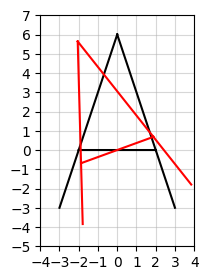

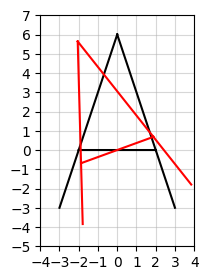

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------- ACHSEN-EINSTELLUNGEN ----------------

# Bereich der x- und y-Achsen — BEI BEDARF ÄNDERN!
x_min, x_max = -4.0, 4.0  # X-Achse von -4 bis +4
y_min, y_max = -5.0, 7.0  # Y-Achse von -5 bis +7

# Erzeuge die Zeichenfläche (Größe abhängig vom Achsbereich)
fig, ax = plt.subplots(figsize=((x_max - x_min) / 4, (y_max - y_min) / 4))
ax.set_aspect('equal')  # Gleiche Skalierung auf beiden Achsen
display(fig)

# Setze Achsengrenzen explizit
ax.axis([x_min, x_max, y_min, y_max])
display(fig)

# ---------------- GITTER UND TICKS ----------------

# Rasterpunkte auf der x-Achse — ÄNDERN BEI ANDEREM RASTER
x_ticks = np.arange(x_min, x_max + 1, 1)
print('x_ticks = ', x_ticks)
ax.set_xticks(x_ticks)

# Rasterpunkte auf der y-Achse
y_ticks = np.arange(y_min, y_max + 1, 1)
print('y_ticks = ', y_ticks)
ax.set_yticks(y_ticks)
display(fig)

# Gitter aktivieren
ax.grid(True)
display(fig)

# Feinraster (Nebenraster) aktivieren
ax.set_xticks(np.arange(x_min, x_max + 1), minor=True)
ax.set_yticks(np.arange(y_min, y_max + 1), minor=True)
ax.grid(which='minor', alpha=0.1)  # Nebenraster: dezent
ax.grid(which='major', alpha=0.5)  # Hauptraster: sichtbar
display(fig)

# ---------------- PUNKTE / FIGUR DEFINIEREN ----------------

# Originalpunkte (mehrere Linien durch NaN getrennt)
# HIER ÄNDERN BEI ANDEREN PUNKTEN ODER FORMEN!
x1 = np.array([-3, 0, np.nan, -2, 2, np.nan, 0, 3])
y1 = np.array([-3, 6, np.nan, 0, 0, np.nan, 6, -3])

# Zeichne ursprüngliche Figur in Schwarz
ax.plot(x1, y1, color='Black')
display(fig)

# ---------------- DREHUNG DER FIGUR ----------------

# Drehwinkel in Radiant — HIER ÄNDERN BEI ANDEREM WINKEL!
alpha = np.pi / 9  # = 20° Drehung gegen den Uhrzeigersinn

# Rotationsmatrix definieren
R = np.array([
    [np.cos(alpha), -np.sin(alpha)],
    [np.sin(alpha),  np.cos(alpha)]
])

# Originalkoordinaten kombinieren
XY = np.array([x1, y1])

# Anwendung der Drehung auf alle Punkte
A = np.matmul(R, XY)

# Zeichne die gedrehte Figur in Rot
ax.plot(A[0,], A[1,], color='Red')
display(fig)


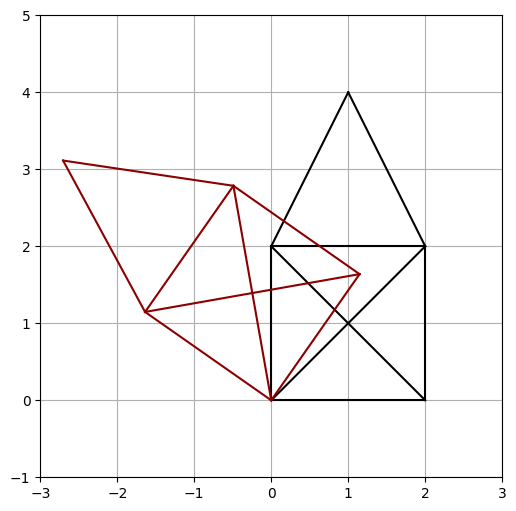

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------- KOORDINATEN DEFINIEREN ----------------

# Eckpunkte des Hauses – bei anderen Figuren hier ändern!
A = np.array([0, 0])      # untere linke Ecke
B = np.array([2, 0])      # untere rechte Ecke
C = np.array([2, 2])      # obere rechte Ecke
D = np.array([0, 2])      # obere linke Ecke
E = np.array([1, 4])      # Dachspitze

# Linien für die Hausumrisse (Wände + Dachlinien) — HIER ANPASSEN BEI ANDERER FORM
linien_haus = [
    [A, B],  # untere Linie
    [B, C],  # rechte Wand
    [C, D],  # obere Wand
    [D, A],  # linke Wand
    [D, E],  # Dach links
    [C, E]   # Dach rechts
]

# Diagonalen im Rechteck – optional, kannst du auch entfernen oder andere hinzufügen
diagonalen = [
    [A, C],
    [B, D]
]

# ---------------- ROTATION ----------------

# Rotationswinkel in Grad — HIER WINKEL ÄNDERN!
angle_deg = 55
angle_rad = np.radians(angle_deg)  # Umrechnung in Bogenmaß

# Rotationsmatrix für Drehung gegen den Uhrzeigersinn
rotation_matrix = np.array([
    [np.cos(angle_rad), -np.sin(angle_rad)],
    [np.sin(angle_rad),  np.cos(angle_rad)]
])

# ---------------- PLOT ERSTELLEN ----------------

# Erstelle ein quadratisches Plotfenster
fig, ax = plt.subplots(figsize=(6, 6))

# Zeichne das ursprüngliche Haus in Schwarz
for linie in linien_haus:
    pts = np.array(linie)
    ax.plot(pts[:, 0], pts[:, 1], 'k')  # 'k' steht für schwarz

# Zeichne ursprüngliche Diagonalen in Schwarz
for diag in diagonalen:
    pts = np.array(diag)
    ax.plot(pts[:, 0], pts[:, 1], 'k')

# Zeichne rotiertes Haus in Dunkelrot — DREHUNG WIRD HIER ANGEWANDT
for linie in linien_haus:
    pts = np.array(linie)
    rot_pts = pts @ rotation_matrix.T  # Matrixmultiplikation
    ax.plot(rot_pts[:, 0], rot_pts[:, 1], color='darkred')

# Zeichne rotierte Diagonalen in Dunkelrot
for diag in diagonalen:
    pts = np.array(diag)
    rot_pts = pts @ rotation_matrix.T
    ax.plot(rot_pts[:, 0], rot_pts[:, 1], color='darkred')

# ---------------- ANSICHTSEINSTELLUNGEN ----------------

ax.set_aspect('equal', adjustable='box')  # gleiche Skalierung
ax.grid(True)                             # Gitter anzeigen

# Achsenausschnitt — BEI ANDEREM HAUS ODER ROTATION HIER ANPASSEN!
ax.set_xlim(-3, 3)
ax.set_ylim(-1, 5)

plt.show()
